In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import missingno as msno
from plotly.offline import init_notebook_mode, iplot
import statistics
import scipy.stats as stats
import plotly.graph_objs as go

# Importing Data

In [83]:
bankData = pd.read_csv("Assignment3-Marketing-Dataset.csv")

In [84]:
pd.concat([bankData.head(),bankData.tail()])

row ID  age          job  marital            education  default  \
0          Row0   56    housemaid  married             basic.4y       no   
1          Row1   56     services  married          high.school       no   
2          Row2   45     services  married             basic.9y  unknown   
3          Row3   59       admin.  married  professional.course       no   
4          Row4   41  blue-collar  married              unknown  unknown   
26355  Row26355   29   unemployed   single             basic.4y       no   
26356  Row26356   46  blue-collar  married  professional.course       no   
26357  Row26357   56      retired  married    university.degree       no   
26358  Row26358   44   technician  married  professional.course       no   
26359  Row26359   74      retired  married  professional.course       no   

      housing loan    contact month  ... campaign  pdays  previous  \
0          no   no  telephone   may  ...        1    999         0   
1          no  yes  telephone   may  ...        1    999         0   
2          no   no  telephone   may  ...        1    999         0   
3          no   no  telephone   may  ...        1    999         0   
4          no   no  telephone   may  ...        1    999         0   
26355     yes   no   cellular   nov  ...        1      9         1   
26356      no   no   cellular   nov  ...        1    999         0   
26357     yes   no   cellular   nov  ...        2    999         0   
26358      no   no   cellular   nov  ...        1    999         0   
26359     yes   no   cellular   nov  ...        3    999         1   

          poutcome  emp.var.rate cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent           1.1         93.994          -36.4      4.857   
1      nonexistent           1.1         93.994          -36.4      4.857   
2      nonexistent           1.1         93.994          -36.4      4.857   
3      nonexistent           1.1         93.994          -36.4      4.857   
4      nonexistent           1.1         93.994          -36.4      4.857   
26355      success          -1.1         94.767          -50.8      1.028   
26356  nonexistent          -1.1         94.767          -50.8      1.028   
26357  nonexistent          -1.1         94.767          -50.8      1.028   
26358  nonexistent          -1.1         94.767          -50.8      1.028   
26359      failure          -1.1         94.767          -50.8      1.028   

       nr.employed  subscribed  
0           5191.0           0  
1           5191.0           0  
2           5191.0           0  
3           5191.0           0  
4           5191.0           0  
26355       4963.6           0  
26356       4963.6           0  
26357       4963.6           0  
26358       4963.6           1  
26359       4963.6           0  

[10 rows x 22 columns]

In [85]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26360 entries, 0 to 26359
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row ID          26360 non-null  object 
 1   age             26360 non-null  int64  
 2   job             26360 non-null  object 
 3   marital         26360 non-null  object 
 4   education       26360 non-null  object 
 5   default         26360 non-null  object 
 6   housing         26360 non-null  object 
 7   loan            26360 non-null  object 
 8   contact         26360 non-null  object 
 9   month           26360 non-null  object 
 10  day_of_week     26360 non-null  object 
 11  duration        26360 non-null  int64  
 12  campaign        26360 non-null  int64  
 13  pdays           26360 non-null  int64  
 14  previous        26360 non-null  int64  
 15  poutcome        26360 non-null  object 
 16  emp.var.rate    26360 non-null  float64
 17  cons.price.idx  26360 non-null 

# Dealing Missing Value

In [86]:
bankData.replace(['unknown'], pd.NA, inplace=True)

In [87]:
bankData.isnull().sum()

row ID               0
age                  0
job                212
marital             51
education         1080
default           5551
housing            647
loan               647
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
subscribed           0
dtype: int64

In [88]:
bankData.isnull().mean() * 100

row ID             0.000000
age                0.000000
job                0.804249
marital            0.193475
education          4.097117
default           21.058422
housing            2.454476
loan               2.454476
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
subscribed         0.000000
dtype: float64

In [89]:
# dropping 'default' attribute as it has 20% of missing values
bankData.drop(['default'],axis=1, inplace=True)
missing_categorical = ['job','marital','education','housing','loan']

In [90]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= pd.NA , strategy='most_frequent')
bankData[missing_categorical] = imputer.fit_transform(bankData[missing_categorical])
bankData

row ID  age          job  marital            education housing loan  \
0          Row0   56    housemaid  married             basic.4y      no   no   
1          Row1   56     services  married          high.school      no  yes   
2          Row2   45     services  married             basic.9y      no   no   
3          Row3   59       admin.  married  professional.course      no   no   
4          Row4   41  blue-collar  married    university.degree      no   no   
...         ...  ...          ...      ...                  ...     ...  ...   
26355  Row26355   29   unemployed   single             basic.4y     yes   no   
26356  Row26356   46  blue-collar  married  professional.course      no   no   
26357  Row26357   56      retired  married    university.degree     yes   no   
26358  Row26358   44   technician  married  professional.course      no   no   
26359  Row26359   74      retired  married  professional.course     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
26355   cellular   nov         fri  ...         1      9         1   
26356   cellular   nov         fri  ...         1    999         0   
26357   cellular   nov         fri  ...         2    999         0   
26358   cellular   nov         fri  ...         1    999         0   
26359   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
26355      success         -1.1          94.767          -50.8      1.028   
26356  nonexistent         -1.1          94.767          -50.8      1.028   
26357  nonexistent         -1.1          94.767          -50.8      1.028   
26358  nonexistent         -1.1          94.767          -50.8      1.028   
26359      failure         -1.1          94.767          -50.8      1.028   

       nr.employed  subscribed  
0           5191.0           0  
1           5191.0           0  
2           5191.0           0  
3           5191.0           0  
4           5191.0           0  
...            ...         ...  
26355       4963.6           0  
26356       4963.6           0  
26357       4963.6           0  
26358       4963.6           1  
26359       4963.6           0  

[26360 rows x 21 columns]

<AxesSubplot:>

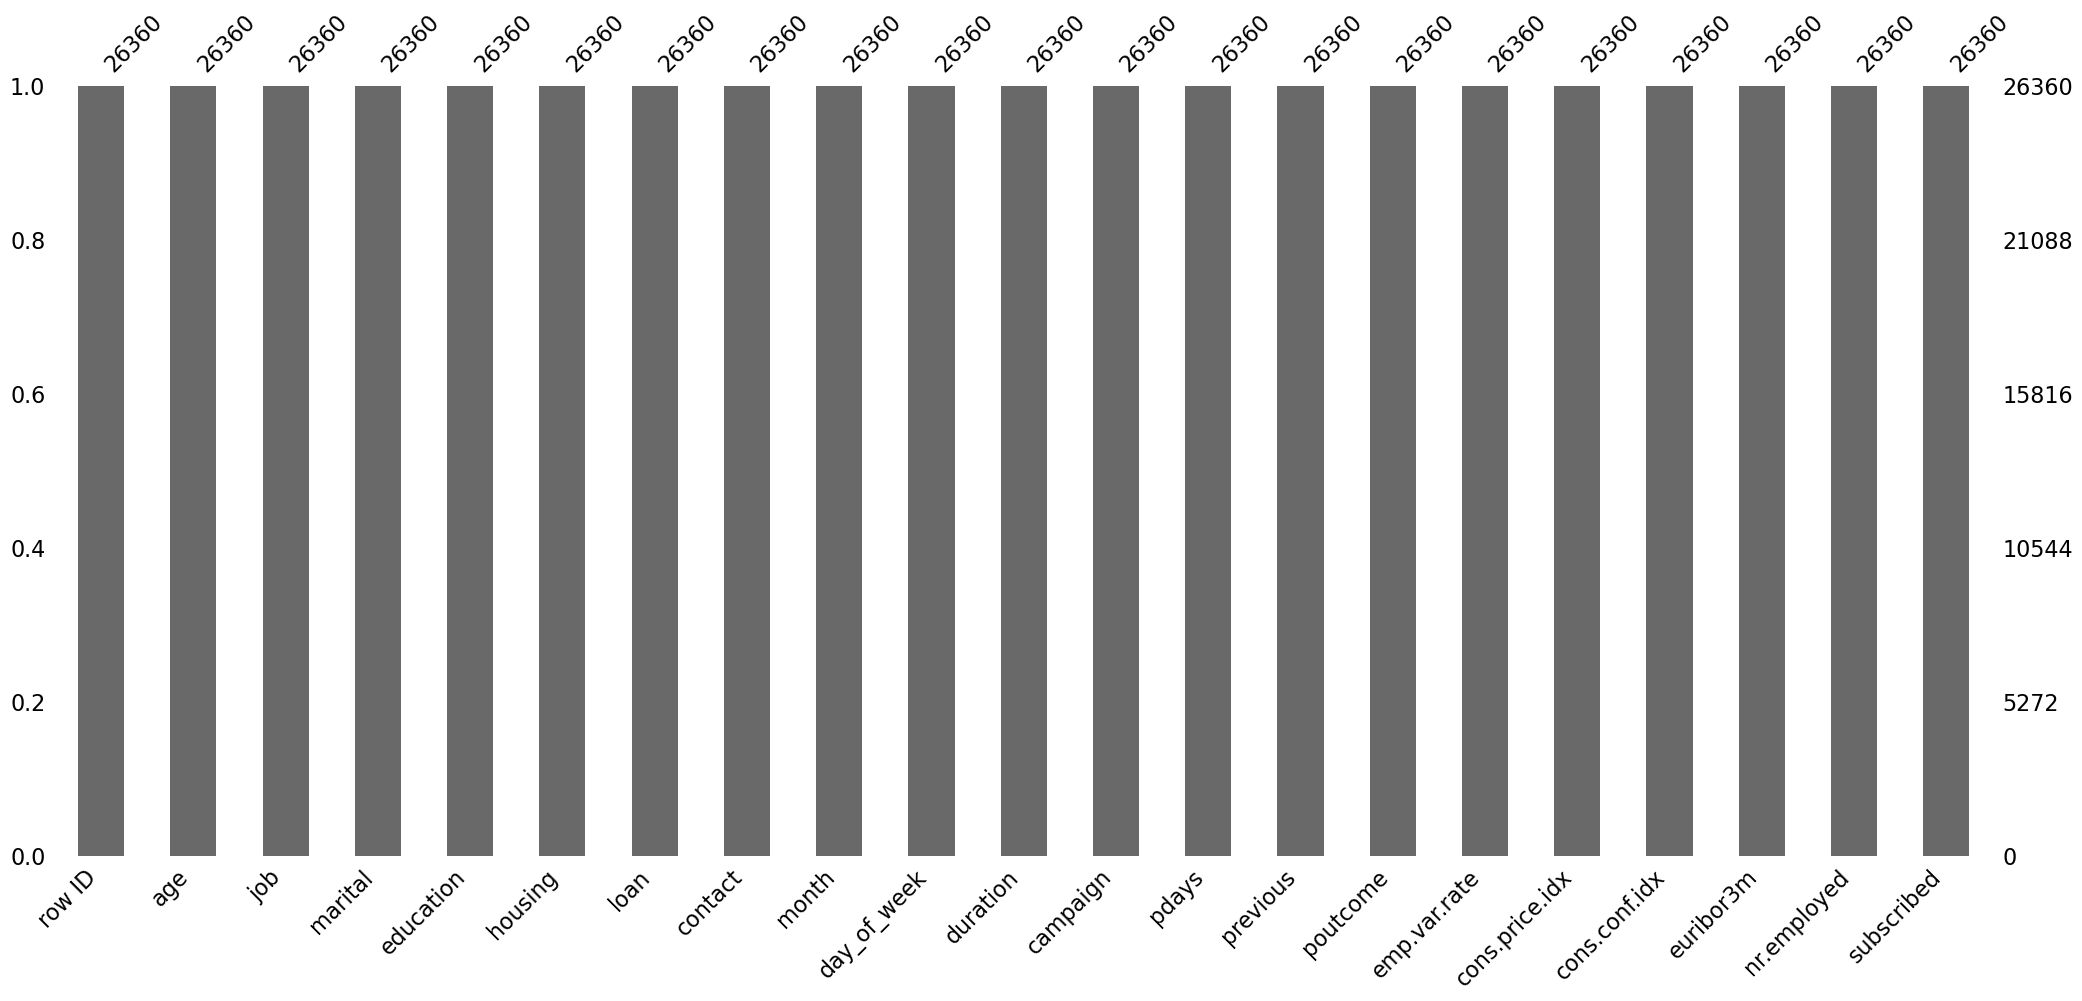

In [91]:
msno.bar(bankData)

In [92]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26360 entries, 0 to 26359
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row ID          26360 non-null  object 
 1   age             26360 non-null  int64  
 2   job             26360 non-null  object 
 3   marital         26360 non-null  object 
 4   education       26360 non-null  object 
 5   housing         26360 non-null  object 
 6   loan            26360 non-null  object 
 7   contact         26360 non-null  object 
 8   month           26360 non-null  object 
 9   day_of_week     26360 non-null  object 
 10  duration        26360 non-null  int64  
 11  campaign        26360 non-null  int64  
 12  pdays           26360 non-null  int64  
 13  previous        26360 non-null  int64  
 14  poutcome        26360 non-null  object 
 15  emp.var.rate    26360 non-null  float64
 16  cons.price.idx  26360 non-null  float64
 17  cons.conf.idx   26360 non-null 

## Data Exploration

In [93]:
bankData.describe()

age      duration      campaign         pdays      previous  \
count  26360.000000  26360.000000  26360.000000  26360.000000  26360.000000   
mean      40.055994    258.799317      2.556639    961.516161      0.173065   
std       10.452764    263.562218      2.715861    189.261156      0.490529   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    179.000000      2.000000    999.000000      0.000000   
75%       47.000000    320.000000      3.000000    999.000000      0.000000   
max       98.000000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  26360.000000    26360.000000   26360.000000  26360.000000   
mean       0.074848       93.570798     -40.490303      3.618071   
std        1.576832        0.578183       4.635120      1.735283   
min       -3.400000       92.201000     -50.800000      0.634000   
25%       -1.800000       93.075000     -42.700000      1.344000   
50%        1.100000       93.444000     -41.800000      4.857000   
75%        1.400000       93.994000     -36.400000      4.961000   
max        1.400000       94.767000     -26.900000      5.045000   

        nr.employed    subscribed  
count  26360.000000  26360.000000  
mean    5167.032845      0.112443  
std       72.089807      0.315917  
min     4963.600000      0.000000  
25%     5099.100000      0.000000  
50%     5191.000000      0.000000  
75%     5228.100000      0.000000  
max     5228.100000      1.000000

In [94]:
categorical_attribute = ['job','marital','education','housing','loan','contact','month','day_of_week','poutcome','subscribed']
numerical_attribute = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx'
                       ,'euribor3m','nr.employed']

In [95]:
for i in bankData[numerical_attribute] :
    print(bankData[i].value_counts(),'\n')

31    1258
32    1197
33    1179
36    1143
34    1112
      ... 
89       2
95       1
87       1
91       1
94       1
Name: age, Length: 78, dtype: int64 

136     122
72      114
85      114
96      113
90      112
       ... 
1056      1
1389      1
1019      1
1806      1
1868      1
Name: duration, Length: 1413, dtype: int64 

1     11243
2      6837
3      3416
4      1691
5      1014
6       627
7       384
8       272
9       189
10      157
11      112
12       74
13       66
15       38
14       35
17       33
16       30
18       19
20       19
21       12
23       11
19       11
22       11
27        8
24        8
29        7
26        6
28        5
31        4
30        4
25        3
35        3
33        3
32        2
40        2
34        2
42        1
56        1
Name: campaign, dtype: int64 

999    25365
3        296
6        267
4         80
2         43
9         41
7         39
12        37
10        33
5         26
13        25
11        18
15        18
1       

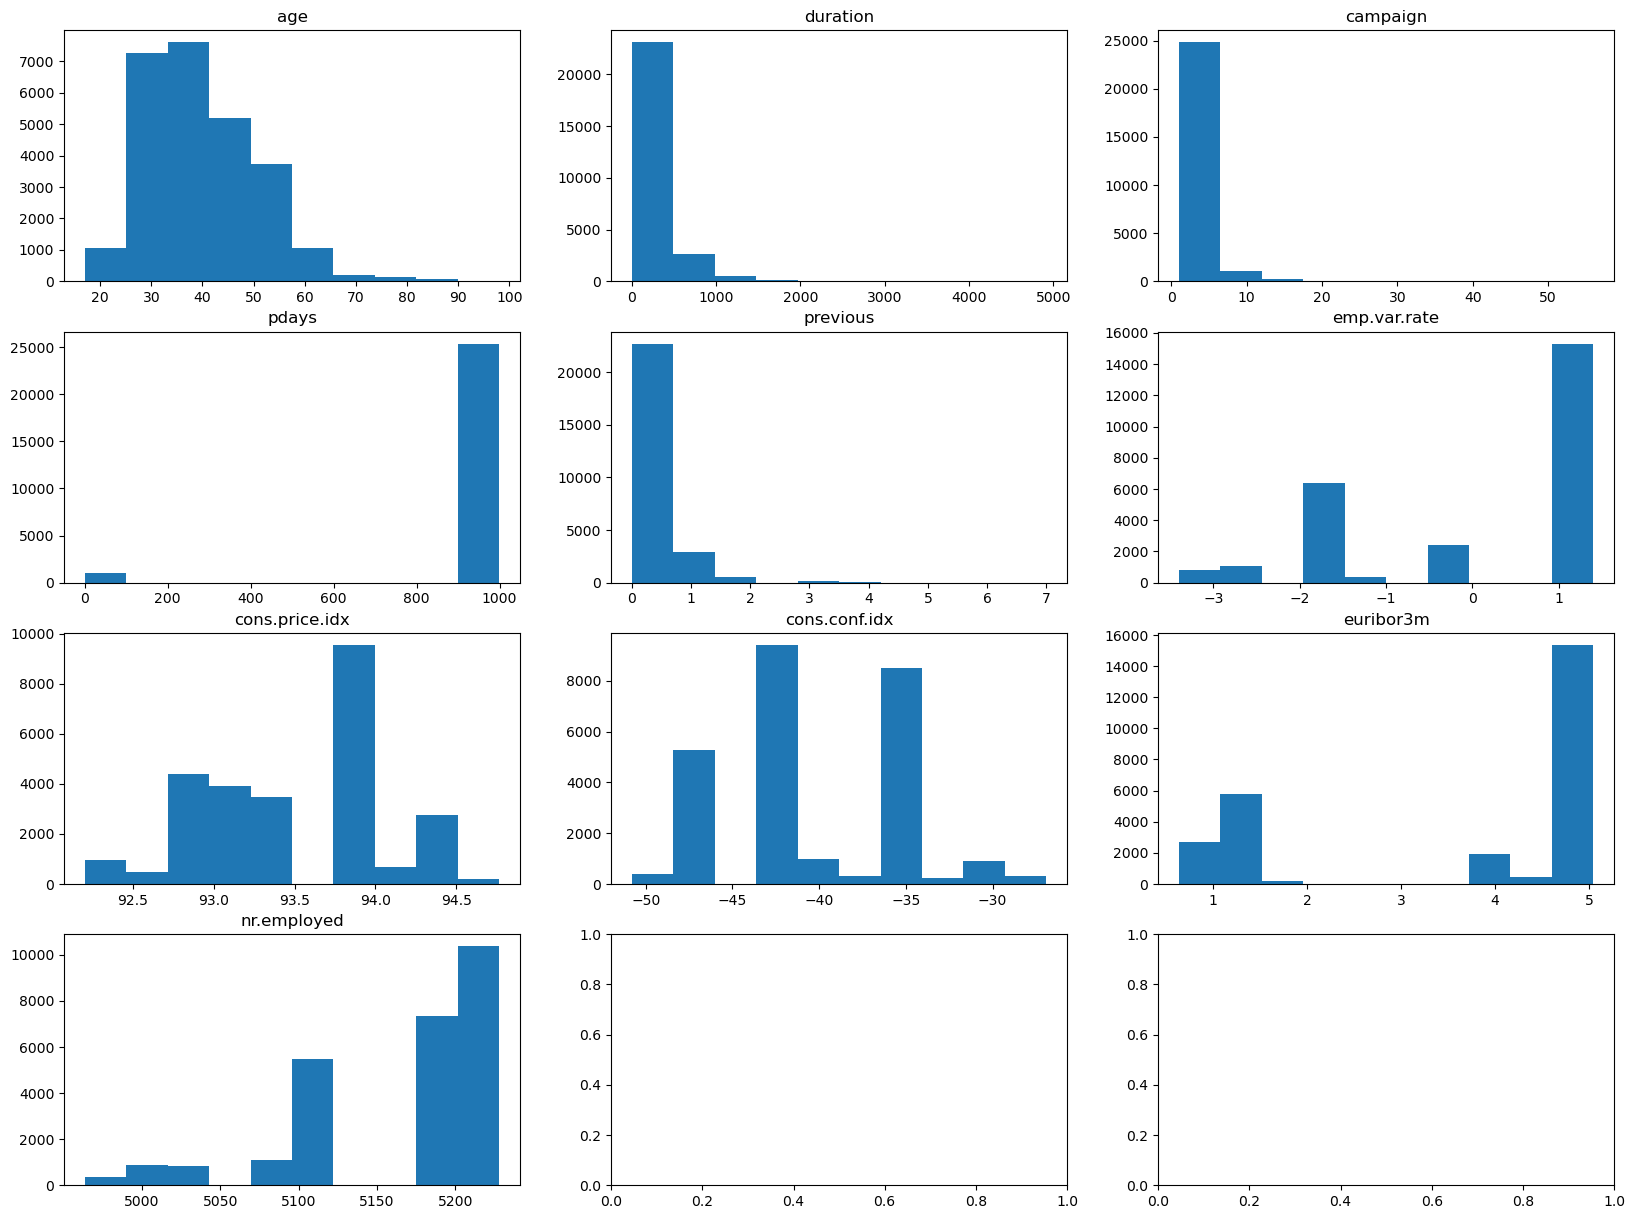

In [96]:
fig, axs = plt.subplots(4, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in numerical_attribute:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(bankData[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

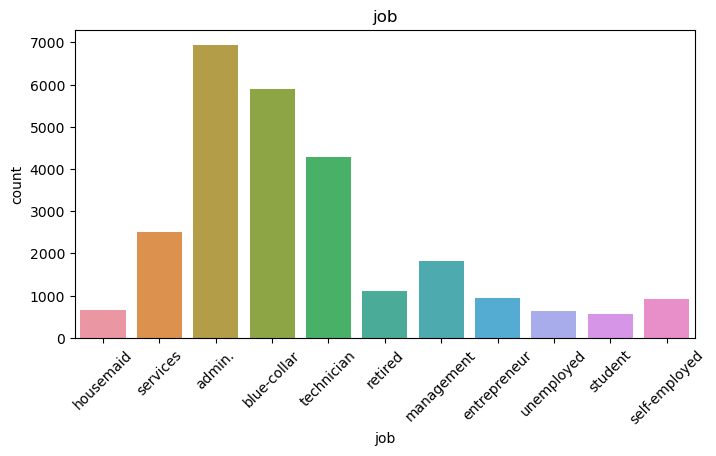

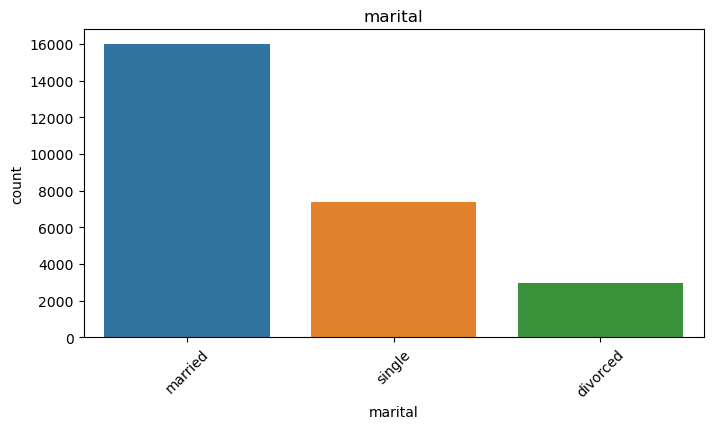

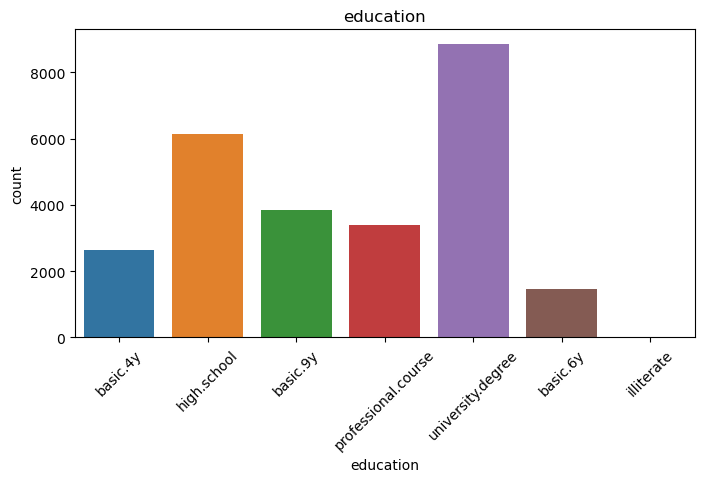

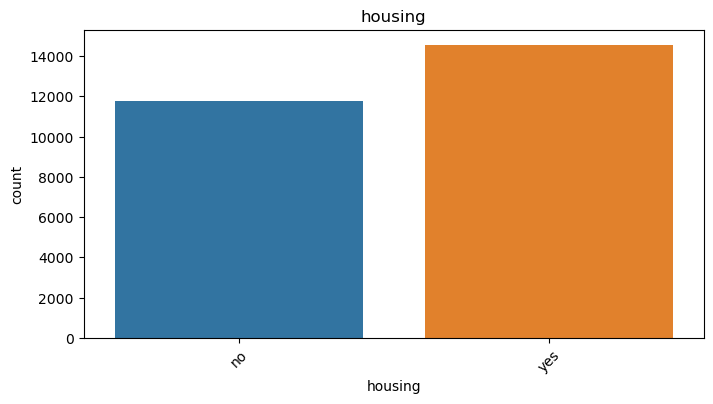

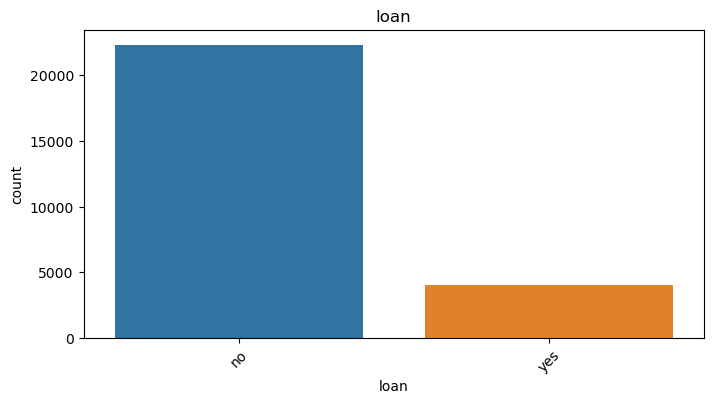

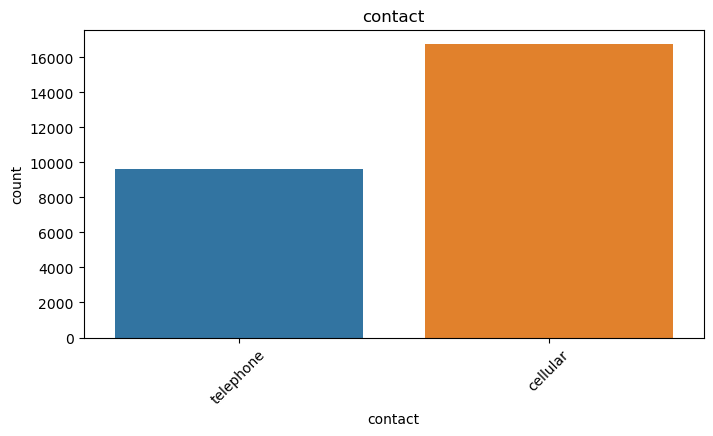

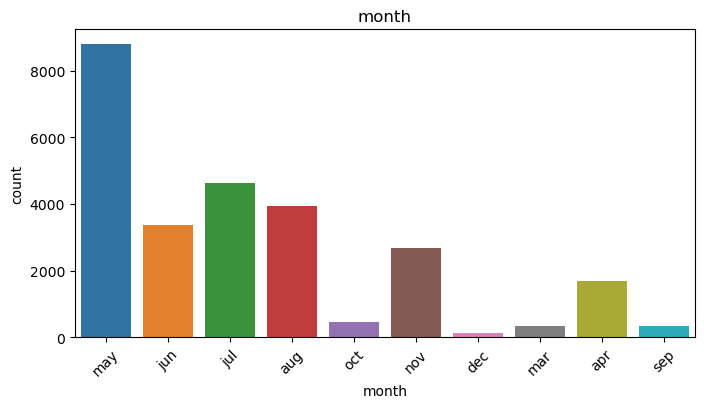

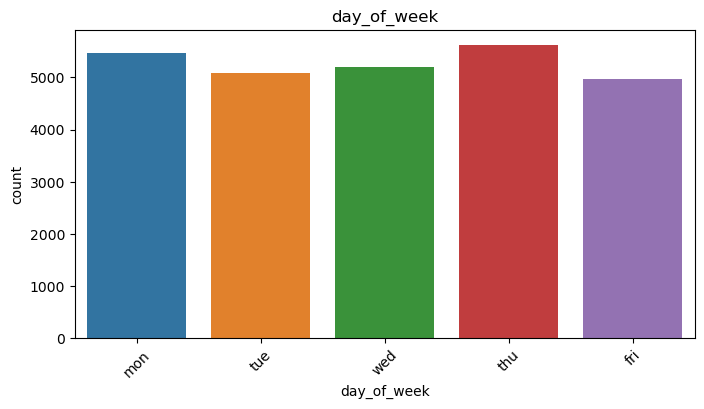

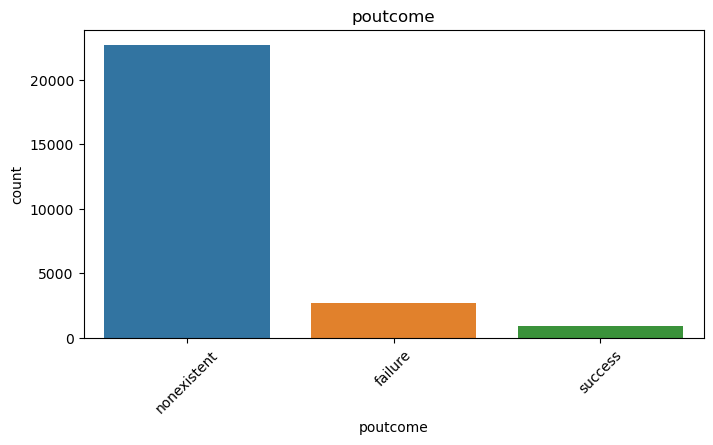

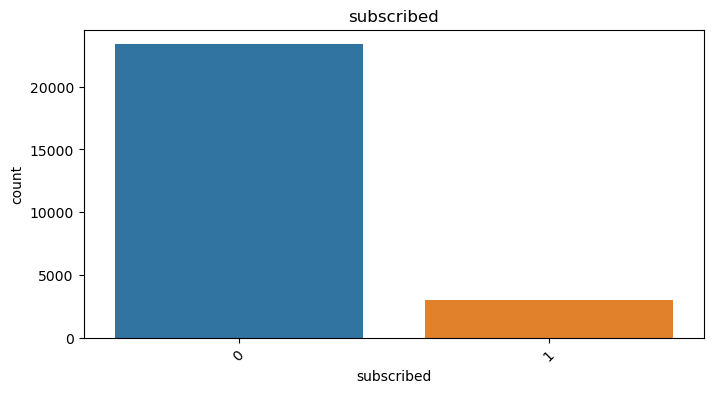

In [97]:
for col in categorical_attribute:
    plt.figure(figsize=(8,4))
    sns.countplot(x=bankData[col], data=bankData)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

In [98]:
for i in bankData[categorical_attribute] :
    print(bankData[i].value_counts(),'\n')

admin.           6951
blue-collar      5898
technician       4293
services         2519
management       1821
retired          1116
entrepreneur      945
self-employed     928
housemaid         668
unemployed        646
student           575
Name: job, dtype: int64 

married     15988
single       7399
divorced     2973
Name: marital, dtype: int64 

university.degree      8856
high.school            6143
basic.9y               3857
professional.course    3385
basic.4y               2633
basic.6y               1472
illiterate               14
Name: education, dtype: int64 

yes    14577
no     11783
Name: housing, dtype: int64 

no     22343
yes     4017
Name: loan, dtype: int64 

cellular     16750
telephone     9610
Name: contact, dtype: int64 

may    8797
jul    4631
aug    3930
jun    3381
nov    2668
apr    1676
oct     454
sep     353
mar     335
dec     135
Name: month, dtype: int64 

thu    5631
mon    5466
wed    5197
tue    5091
fri    4975
Name: day_of_week, dtype: int64 

n

0    23396
1     2964
Name: subscribed, dtype: int64


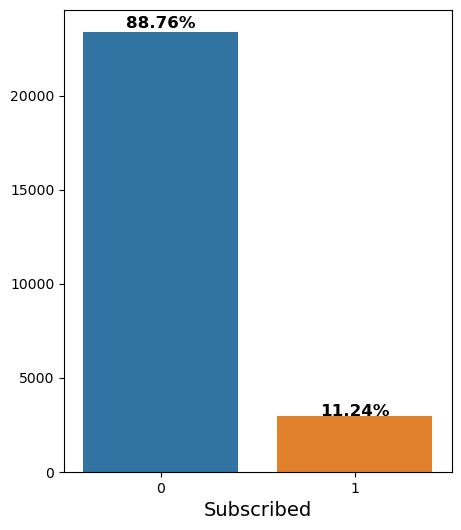

In [99]:
print(bankData["subscribed"].value_counts())
plt.figure(figsize=(5,6))
ax = sns.countplot(data = bankData, x = bankData.subscribed)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{round(height * 100 / bankData.shape[0], 2)}%', (x + width/2, y + height * 1.01), ha='center', weight = 'bold', fontsize = 12)
plt.xlabel(r'Subscribed', fontsize = 14)
plt.ylabel(r'')
plt.show()

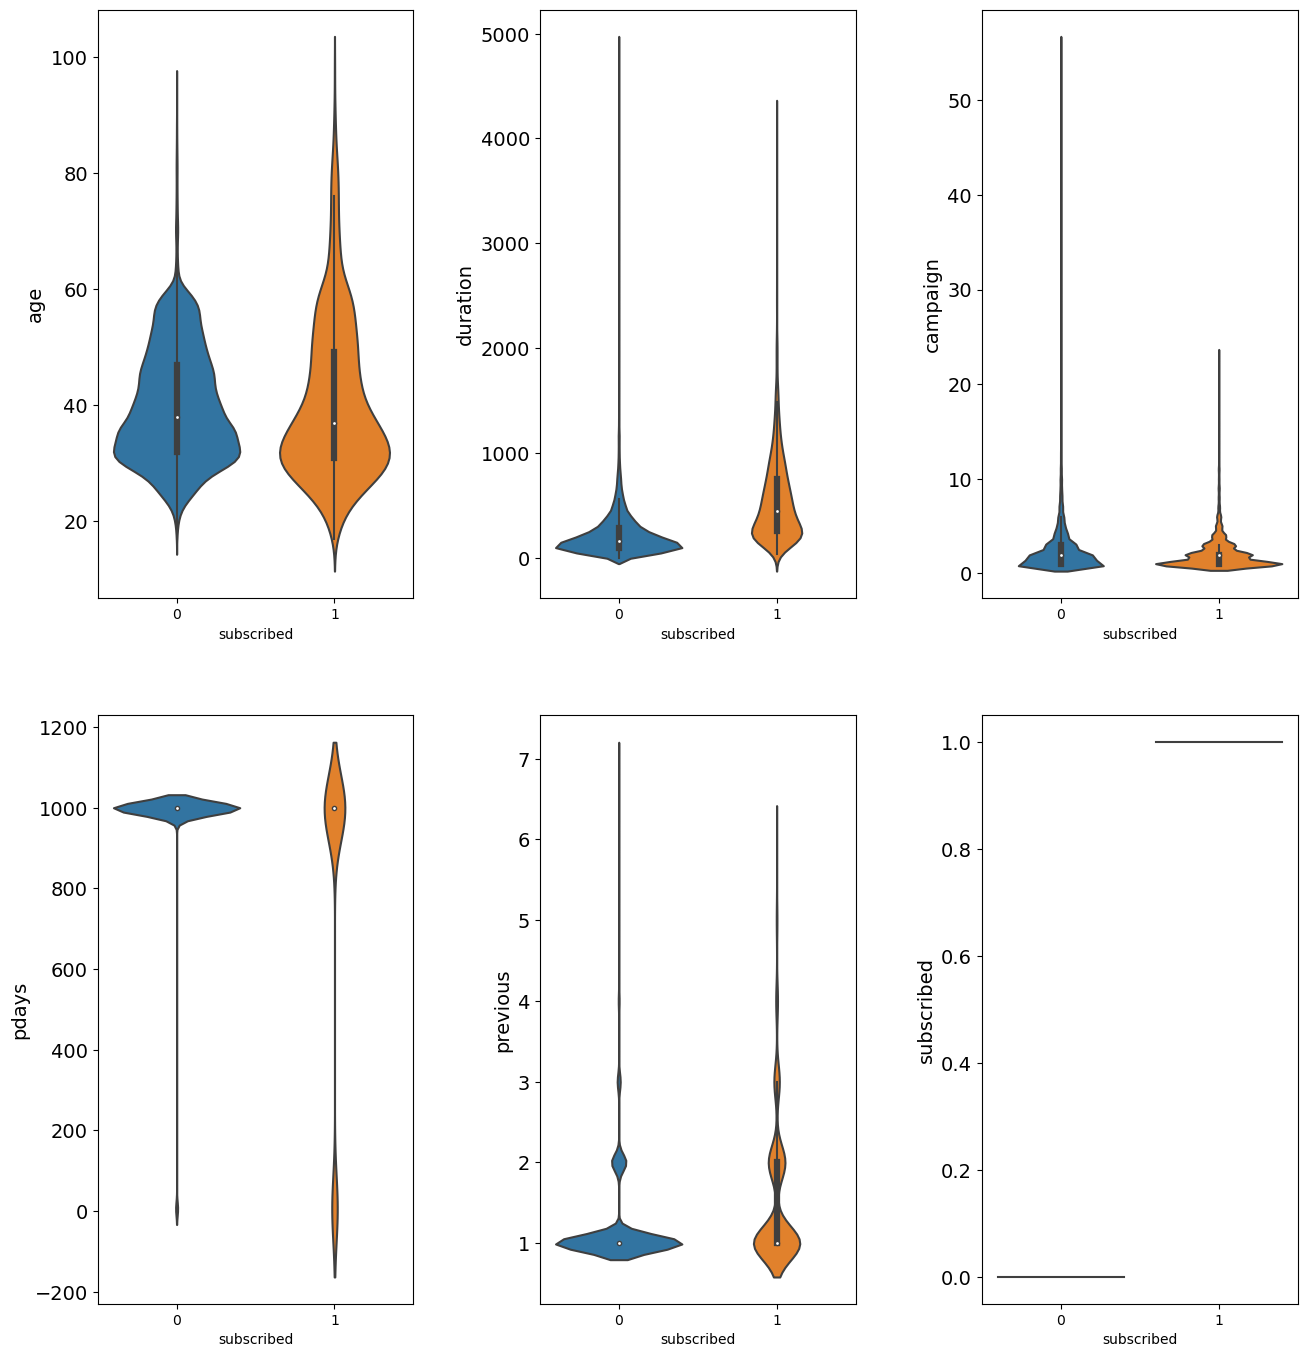

In [100]:
df_num = bankData.select_dtypes('int').columns
plt.figure(figsize = (15, 25))
for idx, col in enumerate(df_num):
    plt.subplot(3, 3, idx + 1)
    if col == 'pdays':
        ax = sns.violinplot(data = bankData, y = bankData[bankData[col] > -1][col], x = bankData.subscribed, inner = 'box')
    elif col == 'previous':
        ax = sns.violinplot(data = bankData, y = bankData[bankData[col] > 0][col], x = bankData.subscribed, inner = 'box')
    else:
        ax = sns.violinplot(data = bankData, y = bankData[col], x = bankData.subscribed)
    #plt.axhline(df[col].mean(), color='red', linewidth=3)
    #plt.axhline(df[col].median(), color='green', linewidth=3)
    plt.ylabel(col, fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.2)

In [101]:
c_df = pd.DataFrame()
c_df['age_yes'] = (bankData[bankData['subscribed'] == 1][['subscribed','age']].describe())['age']
c_df['age_no'] = (bankData[bankData['subscribed'] == 0][['subscribed','age']].describe())['age']

c_df

age_yes        age_no
count  2964.000000  23396.000000
mean     40.789811     39.963028
std      13.751986      9.953598
min      17.000000     17.000000
25%      31.000000     32.000000
50%      37.000000     38.000000
75%      49.250000     47.000000
max      98.000000     95.000000

In [102]:
pivotTable = pd.pivot_table(bankData, values='subscribed', index='job',
                    columns='education',aggfunc= 'sum')
pivotTable

education      basic.4y  basic.6y  basic.9y  high.school  illiterate  \
job                                                                    
admin.              9.0       6.0      28.0        254.0         0.0   
blue-collar        78.0      65.0     148.0         58.0         0.0   
entrepreneur        5.0       7.0       7.0         11.0         1.0   
housemaid          28.0       4.0       2.0          9.0         0.0   
management          3.0       5.0       8.0         12.0         NaN   
retired           112.0       6.0       9.0         40.0         2.0   
self-employed       2.0       1.0      13.0          5.0         1.0   
services            5.0      14.0      15.0        134.0         NaN   
student             3.0       6.0      17.0         80.0         NaN   
technician          4.0       3.0      30.0         56.0         NaN   
unemployed         12.0       3.0      15.0         24.0         NaN   

education      professional.course  university.degree  
job                                                    
admin.                        34.0              562.0  
blue-collar                   29.0               24.0  
entrepreneur                   5.0               44.0  
housemaid                      6.0               13.0  
management                     5.0              174.0  
retired                       36.0               58.0  
self-employed                 13.0               64.0  
services                      11.0               33.0  
student                       13.0               62.0  
technician                   218.0              157.0  
unemployed                    13.0               30.0

# Data preprocessing

In [103]:
bankData = bankData.drop('row ID', axis=1)
bankData

age          job  marital            education housing loan    contact  \
0       56    housemaid  married             basic.4y      no   no  telephone   
1       56     services  married          high.school      no  yes  telephone   
2       45     services  married             basic.9y      no   no  telephone   
3       59       admin.  married  professional.course      no   no  telephone   
4       41  blue-collar  married    university.degree      no   no  telephone   
...    ...          ...      ...                  ...     ...  ...        ...   
26355   29   unemployed   single             basic.4y     yes   no   cellular   
26356   46  blue-collar  married  professional.course      no   no   cellular   
26357   56      retired  married    university.degree     yes   no   cellular   
26358   44   technician  married  professional.course      no   no   cellular   
26359   74      retired  married  professional.course     yes   no   cellular   

      month day_of_week  duration  campaign  pdays  previous     poutcome  \
0       may         mon       261         1    999         0  nonexistent   
1       may         mon       307         1    999         0  nonexistent   
2       may         mon       198         1    999         0  nonexistent   
3       may         mon       139         1    999         0  nonexistent   
4       may         mon       217         1    999         0  nonexistent   
...     ...         ...       ...       ...    ...       ...          ...   
26355   nov         fri       112         1      9         1      success   
26356   nov         fri       383         1    999         0  nonexistent   
26357   nov         fri       189         2    999         0  nonexistent   
26358   nov         fri       442         1    999         0  nonexistent   
26359   nov         fri       239         3    999         1      failure   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0               1.1          93.994          -36.4      4.857       5191.0   
1               1.1          93.994          -36.4      4.857       5191.0   
2               1.1          93.994          -36.4      4.857       5191.0   
3               1.1          93.994          -36.4      4.857       5191.0   
4               1.1          93.994          -36.4      4.857       5191.0   
...             ...             ...            ...        ...          ...   
26355          -1.1          94.767          -50.8      1.028       4963.6   
26356          -1.1          94.767          -50.8      1.028       4963.6   
26357          -1.1          94.767          -50.8      1.028       4963.6   
26358          -1.1          94.767          -50.8      1.028       4963.6   
26359          -1.1          94.767          -50.8      1.028       4963.6   

       subscribed  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
26355           0  
26356           0  
26357           0  
26358           1  
26359           0  

[26360 rows x 20 columns]

In [104]:
bankData

age          job  marital            education housing loan    contact  \
0       56    housemaid  married             basic.4y      no   no  telephone   
1       56     services  married          high.school      no  yes  telephone   
2       45     services  married             basic.9y      no   no  telephone   
3       59       admin.  married  professional.course      no   no  telephone   
4       41  blue-collar  married    university.degree      no   no  telephone   
...    ...          ...      ...                  ...     ...  ...        ...   
26355   29   unemployed   single             basic.4y     yes   no   cellular   
26356   46  blue-collar  married  professional.course      no   no   cellular   
26357   56      retired  married    university.degree     yes   no   cellular   
26358   44   technician  married  professional.course      no   no   cellular   
26359   74      retired  married  professional.course     yes   no   cellular   

      month day_of_week  duration  campaign  pdays  previous     poutcome  \
0       may         mon       261         1    999         0  nonexistent   
1       may         mon       307         1    999         0  nonexistent   
2       may         mon       198         1    999         0  nonexistent   
3       may         mon       139         1    999         0  nonexistent   
4       may         mon       217         1    999         0  nonexistent   
...     ...         ...       ...       ...    ...       ...          ...   
26355   nov         fri       112         1      9         1      success   
26356   nov         fri       383         1    999         0  nonexistent   
26357   nov         fri       189         2    999         0  nonexistent   
26358   nov         fri       442         1    999         0  nonexistent   
26359   nov         fri       239         3    999         1      failure   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0               1.1          93.994          -36.4      4.857       5191.0   
1               1.1          93.994          -36.4      4.857       5191.0   
2               1.1          93.994          -36.4      4.857       5191.0   
3               1.1          93.994          -36.4      4.857       5191.0   
4               1.1          93.994          -36.4      4.857       5191.0   
...             ...             ...            ...        ...          ...   
26355          -1.1          94.767          -50.8      1.028       4963.6   
26356          -1.1          94.767          -50.8      1.028       4963.6   
26357          -1.1          94.767          -50.8      1.028       4963.6   
26358          -1.1          94.767          -50.8      1.028       4963.6   
26359          -1.1          94.767          -50.8      1.028       4963.6   

       subscribed  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
26355           0  
26356           0  
26357           0  
26358           1  
26359           0  

[26360 rows x 20 columns]

In [105]:
scale_mapper = {"illiterate":0, "basic.4y":1, "basic.6y":2 ,"basic.9y":3,
               "high.school":4,"professional.course":5,"university.degree":6}
bankData["education"] = bankData["education"].replace(scale_mapper)


#label encode works well for df not numpy
# for this one le isnt use bcs we can make our own order

In [106]:
X = bankData.iloc[:, :-1]
y = bankData.iloc[:,-1]

In [107]:
X

age          job  marital  education housing loan    contact month  \
0       56    housemaid  married          1      no   no  telephone   may   
1       56     services  married          4      no  yes  telephone   may   
2       45     services  married          3      no   no  telephone   may   
3       59       admin.  married          5      no   no  telephone   may   
4       41  blue-collar  married          6      no   no  telephone   may   
...    ...          ...      ...        ...     ...  ...        ...   ...   
26355   29   unemployed   single          1     yes   no   cellular   nov   
26356   46  blue-collar  married          5      no   no   cellular   nov   
26357   56      retired  married          6     yes   no   cellular   nov   
26358   44   technician  married          5      no   no   cellular   nov   
26359   74      retired  married          5     yes   no   cellular   nov   

      day_of_week  duration  campaign  pdays  previous     poutcome  \
0             mon       261         1    999         0  nonexistent   
1             mon       307         1    999         0  nonexistent   
2             mon       198         1    999         0  nonexistent   
3             mon       139         1    999         0  nonexistent   
4             mon       217         1    999         0  nonexistent   
...           ...       ...       ...    ...       ...          ...   
26355         fri       112         1      9         1      success   
26356         fri       383         1    999         0  nonexistent   
26357         fri       189         2    999         0  nonexistent   
26358         fri       442         1    999         0  nonexistent   
26359         fri       239         3    999         1      failure   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0               1.1          93.994          -36.4      4.857       5191.0  
1               1.1          93.994          -36.4      4.857       5191.0  
2               1.1          93.994          -36.4      4.857       5191.0  
3               1.1          93.994          -36.4      4.857       5191.0  
4               1.1          93.994          -36.4      4.857       5191.0  
...             ...             ...            ...        ...          ...  
26355          -1.1          94.767          -50.8      1.028       4963.6  
26356          -1.1          94.767          -50.8      1.028       4963.6  
26357          -1.1          94.767          -50.8      1.028       4963.6  
26358          -1.1          94.767          -50.8      1.028       4963.6  
26359          -1.1          94.767          -50.8      1.028       4963.6  

[26360 rows x 19 columns]

In [108]:
# Convert nominal categorical value
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,4,5,6,7,8,13])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Building Models

In [109]:
bankData = pd.get_dummies(bankData, columns = ['job','marital','housing','loan','contact','month','day_of_week','poutcome'])

In [110]:
bank_corr = bankData.corr()

In [111]:
bank_corr['subscribed'].sort_values(ascending=True)

nr.employed            -0.351258
pdays                  -0.320820
euribor3m              -0.306341
emp.var.rate           -0.300278
poutcome_nonexistent   -0.193821
cons.price.idx         -0.143725
contact_telephone      -0.142108
month_may              -0.107764
job_blue-collar        -0.075260
campaign               -0.065436
marital_married        -0.043691
month_jul              -0.033678
job_services           -0.029101
day_of_week_mon        -0.024767
job_entrepreneur       -0.016961
month_aug              -0.016487
marital_divorced       -0.016435
job_housemaid          -0.010019
month_nov              -0.008758
day_of_week_fri        -0.006262
housing_no             -0.006018
job_technician         -0.004787
job_self-employed      -0.003484
month_jun              -0.003293
loan_yes               -0.002567
day_of_week_wed         0.000191
job_management          0.001061
loan_no                 0.002567
housing_yes             0.006018
day_of_week_tue         0.011728
job_unempl

# KNN

In [112]:
from sklearn.model_selection import train_test_split
seed_num = 0 # random_state is set to a value for reproducible output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=seed_num) 

print(X_train.shape)
print(X_test.shape)

(18452, 49)
(7908, 49)


In [113]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
y_pred = clf_knn.predict(X_test)
print ("Accuracy : " )
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 
0.9021244309559939
[[6717  298]
 [ 476  417]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7015
           1       0.58      0.47      0.52       893

    accuracy                           0.90      7908
   macro avg       0.76      0.71      0.73      7908
weighted avg       0.89      0.90      0.90      7908



# checking the accuracy if K increase

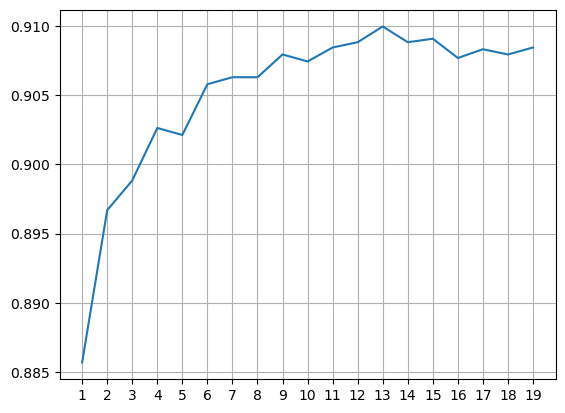

0.9099645928174


In [34]:
scores = []
max_score = 0
best_k = 0
for k in range(1,20):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    score = model_knn.score(X_test, y_test)
    if score > max_score:
        max_score = score
        best_k = k
    scores.append(score)
    
plt.plot(np.arange(1,20), scores)
plt.xticks(np.arange(1,20))
plt.grid()
plt.show()
print(max(scores))

# Parameter Tuning

In [35]:
from sklearn.model_selection import GridSearchCV
k = range(1,21) # 1 until 20


param_grid = [
  {'n_neighbors' : k,
   'metric': ['euclidean','manhattan'],
  }
]
KNN = KNeighborsClassifier() # default weight = uniform
clf_knn = GridSearchCV(KNN, param_grid, cv=5, scoring='accuracy', return_train_score=False)
clf_knn.fit(X_train, y_train);

In [36]:
pd.DataFrame(clf_knn.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_metric  \
0        0.006850      0.006710         0.301221        0.023758    euclidean   
1        0.004880      0.003984         0.283673        0.011026    euclidean   
2        0.005280      0.004380         0.307091        0.010690    euclidean   
3        0.004582      0.004606         0.291334        0.014614    euclidean   
4        0.006795      0.006077         0.316920        0.032956    euclidean   
5        0.003843      0.003590         0.375908        0.043152    euclidean   
6        0.005198      0.003462         0.327004        0.028985    euclidean   
7        0.005711      0.003939         0.330234        0.036786    euclidean   
8        0.003618      0.004496         0.316429        0.024585    euclidean   
9        0.004104      0.003167         0.304015        0.007386    euclidean   
10       0.008433      0.002139         0.331680        0.032700    euclidean   
11       0.007277      0.003831         0.379592        0.052203    euclidean   
12       0.006088      0.003285         0.373357        0.063864    euclidean   
13       0.005769      0.003886         0.398456        0.054512    euclidean   
14       0.005349      0.002839         0.354720        0.031638    euclidean   
15       0.006519      0.001374         0.322430        0.026254    euclidean   
16       0.009681      0.002579         0.414980        0.038932    euclidean   
17       0.005899      0.003196         0.332294        0.016897    euclidean   
18       0.007698      0.001921         0.337294        0.032357    euclidean   
19       0.006816      0.006439         0.348055        0.025630    euclidean   
20       0.008887      0.001052         0.832627        0.057767    manhattan   
21       0.007996      0.000006         1.111656        0.082072    manhattan   
22       0.007828      0.004026         1.045305        0.025504    manhattan   
23       0.010306      0.004510         0.994477        0.138155    manhattan   
24       0.008814      0.001009         1.089104        0.089621    manhattan   
25       0.010160      0.002733         0.994062        0.142437    manhattan   
26       0.003631      0.003655         0.933626        0.131103    manhattan   
27       0.010892      0.003845         1.193828        0.058885    manhattan   
28       0.009322      0.007209         1.067809        0.077308    manhattan   
29       0.006841      0.003517         1.034585        0.041960    manhattan   
30       0.008150      0.004076         0.751134        0.087786    manhattan   
31       0.005935      0.005259         0.825791        0.054379    manhattan   
32       0.006760      0.006088         0.909298        0.089582    manhattan   
33       0.007151      0.003140         0.818393        0.086335    manhattan   
34       0.008197      0.003008         0.970334        0.056617    manhattan   
35       0.007375      0.005335         0.927480        0.096342    manhattan   
36       0.004430      0.003679         0.965343        0.166066    manhattan   
37       0.007325      0.003807         1.041030        0.154917    manhattan   
38       0.005673      0.003075         1.030946        0.153695    manhattan   
39       0.008044      0.001457         1.241114        0.067447    manhattan   

   param_n_neighbors                                      params  \
0                  1   {'metric': 'euclidean', 'n_neighbors': 1}   
1                  2   {'metric': 'euclidean', 'n_neighbors': 2}   
2                  3   {'metric': 'euclidean', 'n_neighbors': 3}   
3                  4   {'metric': 'euclidean', 'n_neighbors': 4}   
4                  5   {'metric': 'euclidean', 'n_neighbors': 5}   
5                  6   {'metric': 'euclidean', 'n_neighbors': 6}   
6                  7   {'metric': 'euclidean', 'n_neighbors': 7}   
7                  8   {'metric': 'euclidean', 'n_neighbors': 8}   
8                  9   {'metric': 'euclidean', 'n_neighbors': 9}   
9 

0.9129632542058286


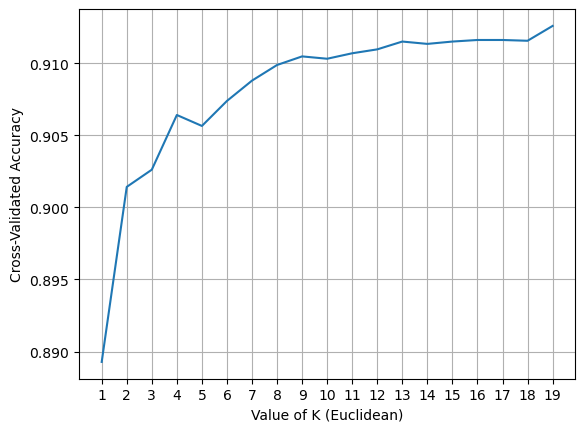

In [37]:
score = clf_knn.cv_results_['mean_test_score']

plt.plot(np.arange(1,20), score[0:19])
plt.xticks(np.arange(1,20))
plt.grid()
plt.show
plt.xlabel('Value of K (Euclidean)')
plt.ylabel('Cross-Validated Accuracy')
print(max(score))

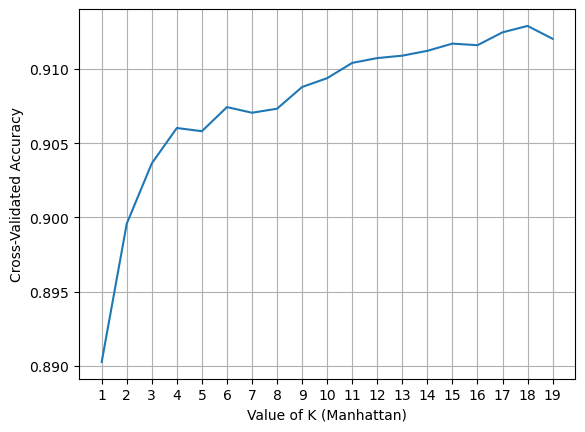

0.9129632542058286


In [38]:
score = clf_knn.cv_results_['mean_test_score']

plt.plot(np.arange(1,20), score[20:39])
plt.xticks(np.arange(1,20))
plt.xlabel('Value of K (Manhattan)')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()
plt.show()
print(max(score))

In [39]:
#clf_mean_scores = clf_knn.cv_results_['mean_test_score']
#avg = 0
#for i in clf_mean_scores:
#    avg = avg + i
#avg = avg / len(clf_mean_scores)
#print("Mean score: ",avg)

In [40]:
clf_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 20}

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
y_pred = clf_knn.predict(X_test)
print ("Accuracy : " )
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 
0.9107233181588265
[[6781  234]
 [ 472  421]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7015
           1       0.64      0.47      0.54       893

    accuracy                           0.91      7908
   macro avg       0.79      0.72      0.75      7908
weighted avg       0.90      0.91      0.90      7908



In [42]:
from sklearn.model_selection import cross_val_score, cross_validate
scores = cross_validate(clf_knn, X_train, y_train, cv=5,
                        scoring=('accuracy'),
                        return_train_score=True)
scores

{'fit_time': array([88.62902856, 83.74989104, 77.76411223, 78.80770063, 76.41854668]),
 'score_time': array([0.68618917, 0.79016232, 0.94607425, 0.31484056, 0.31301713]),
 'test_score': array([0.91384449, 0.91384449, 0.91544715, 0.91165312, 0.90921409]),
 'train_score': array([0.91931441, 0.91931441, 0.92081019, 0.92074245, 0.92053922])}

[[6781  234]
 [ 472  421]]


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



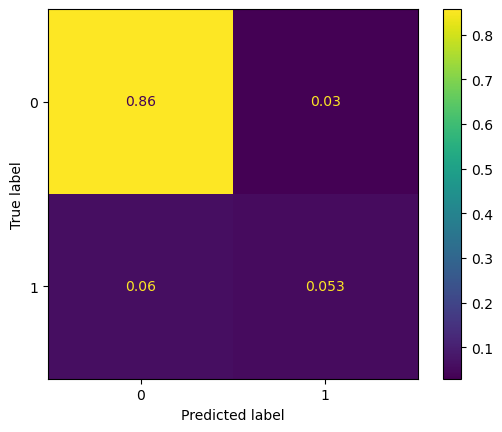

In [43]:
y_pred = clf_knn.predict(X_test)

# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# normalize="all" converts the raw numbers to proportions.
# Can be used in both of the following functions.
mat = confusion_matrix(y_test, y_pred)
print(mat)

plot_confusion_matrix(clf_knn, X_test, y_test, normalize="all");
#plot_confusion_matrix(clf, X_test, y_test, normalize="all");

The AUC is 0.926
Threshold	TPR vs FPR
2.000	0.000 vs 0.000
1.000	0.001 vs 0.000
0.950	0.015 vs 0.000
0.900	0.048 vs 0.001
0.850	0.087 vs 0.002
0.800	0.130 vs 0.005
0.750	0.196 vs 0.008
0.700	0.270 vs 0.014
0.650	0.339 vs 0.021
0.600	0.401 vs 0.027
0.550	0.471 vs 0.033
0.500	0.538 vs 0.042
0.450	0.586 vs 0.051
0.400	0.624 vs 0.061
0.350	0.672 vs 0.072
0.300	0.739 vs 0.087
0.250	0.793 vs 0.108
0.200	0.842 vs 0.128
0.150	0.894 vs 0.155
0.100	0.936 vs 0.194
0.050	0.973 vs 0.285
0.000	1.000 vs 1.000


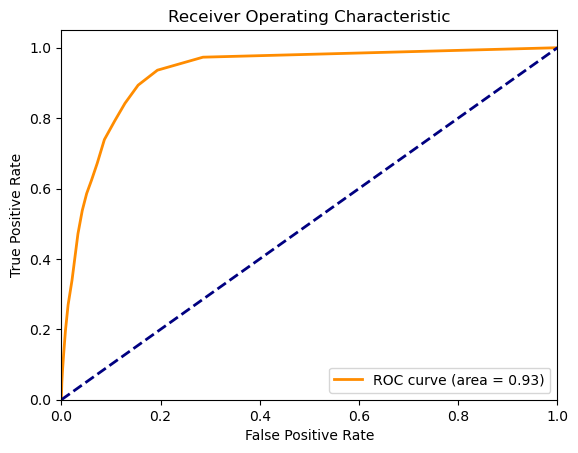

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = clf_knn.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Normalized KNN

In [45]:
from sklearn.preprocessing import MinMaxScaler
seed_num = 0

X1 = X
scaler = MinMaxScaler(feature_range=(0,1))
X1 = scaler.fit_transform(X1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, y, test_size = 0.3,random_state=seed_num) 

print(X_train.shape)
print(X_test.shape)

(18452, 49)
(7908, 49)


In [46]:
X_train2[0]

array([0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.49382716, 1.        ,
       0.02277349, 0.        , 1.        , 0.        , 0.10416667,
       0.29696025, 0.41841004, 0.14191793, 0.42570888])

In [47]:
from sklearn.model_selection import GridSearchCV
k = range(1,21) # 1 until 20


param_grid = [
  {'n_neighbors' : k,
   'metric': ['euclidean','manhattan']
  }
]
KNN = KNeighborsClassifier() # default weight = uniform
clf_knn2 = GridSearchCV(KNN, param_grid, cv=5, scoring='accuracy', return_train_score=False)
clf_knn2.fit(X_train, y_train);

In [48]:
clf_knn2.best_params_

{'metric': 'manhattan', 'n_neighbors': 20}

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
y_pred = clf_knn2.predict(X_test)
print ("Accuracy : " )
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 
0.9107233181588265
[[6781  234]
 [ 472  421]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7015
           1       0.64      0.47      0.54       893

    accuracy                           0.91      7908
   macro avg       0.79      0.72      0.75      7908
weighted avg       0.90      0.91      0.90      7908



In [50]:
from sklearn.model_selection import cross_val_score, cross_validate
scores = cross_validate(clf_knn2, X_train, y_train, cv=5,
                        scoring=('accuracy'),
                        return_train_score=True)
scores

{'fit_time': array([  83.04067326,   76.09192157,   81.86322546, 3516.14442539,
          46.58707857]),
 'score_time': array([0.75110912, 0.89084196, 0.71355414, 0.19205475, 0.19676995]),
 'test_score': array([0.91384449, 0.91384449, 0.91544715, 0.91165312, 0.90921409]),
 'train_score': array([0.91931441, 0.91931441, 0.92081019, 0.92074245, 0.92053922])}

The result isn't great, this is because the model think all features are the same and are all taken into account. Let's try feature selection to reduce complexity

# Normalized + Feature selection

In [51]:
from sklearn.preprocessing import MinMaxScaler
seed_num = 0

X2 = bankData[['duration', 'nr.employed','poutcome_success','euribor3m','cons.conf.idx']]
scaler = MinMaxScaler(feature_range=(0,1))
X2 = scaler.fit_transform(X2)

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3,random_state=seed_num) 

print(X_train.shape)
print(X_test.shape)

(18452, 5)
(7908, 5)


In [52]:
X_train[0]

array([0.02277349, 0.42570888, 0.        , 0.14191793, 0.41841004])

In [53]:
from sklearn.model_selection import GridSearchCV
k = range(1,21) # 1 until 20


param_grid = [
  {'n_neighbors' : k,
   'metric': ['euclidean','manhattan']
  }
]
KNN = KNeighborsClassifier() # default weight = uniform
clf_knn2 = GridSearchCV(KNN, param_grid, cv=5, scoring='accuracy', return_train_score=False)
clf_knn2.fit(X_train, y_train);

In [54]:
clf_knn2.best_params_

{'metric': 'manhattan', 'n_neighbors': 18}

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
y_pred = clf_knn2.predict(X_test)
print ("Accuracy : " )
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 
0.9108497723823976
[[6769  246]
 [ 459  434]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7015
           1       0.64      0.49      0.55       893

    accuracy                           0.91      7908
   macro avg       0.79      0.73      0.75      7908
weighted avg       0.90      0.91      0.91      7908



In [56]:
from sklearn.model_selection import cross_val_score, cross_validate
scores = cross_validate(clf_knn2, X_train, y_train, cv=5,
                        scoring=('accuracy'),
                        return_train_score=True)
scores

{'fit_time': array([20.55189538, 20.1588366 , 19.21460295, 19.61374974, 18.83726335]),
 'score_time': array([0.1143775 , 0.12390304, 0.11303282, 0.10435772, 0.10284758]),
 'test_score': array([0.91276077, 0.91032241, 0.91626016, 0.90298103, 0.9100271 ]),
 'train_score': array([0.92514057, 0.92155003, 0.91979407, 0.92765208, 0.92460371])}

The AUC is 0.936
Threshold	TPR vs FPR
2.000	0.000 vs 0.000
1.000	0.004 vs 0.000
0.944	0.021 vs 0.000
0.889	0.046 vs 0.002
0.833	0.103 vs 0.004
0.778	0.181 vs 0.008
0.722	0.243 vs 0.013
0.667	0.331 vs 0.019
0.611	0.408 vs 0.028
0.556	0.486 vs 0.035
0.500	0.576 vs 0.043
0.444	0.646 vs 0.056
0.389	0.711 vs 0.069
0.333	0.754 vs 0.081
0.278	0.798 vs 0.097
0.222	0.856 vs 0.117
0.167	0.909 vs 0.145
0.111	0.951 vs 0.190
0.056	0.980 vs 0.252
0.000	1.000 vs 1.000


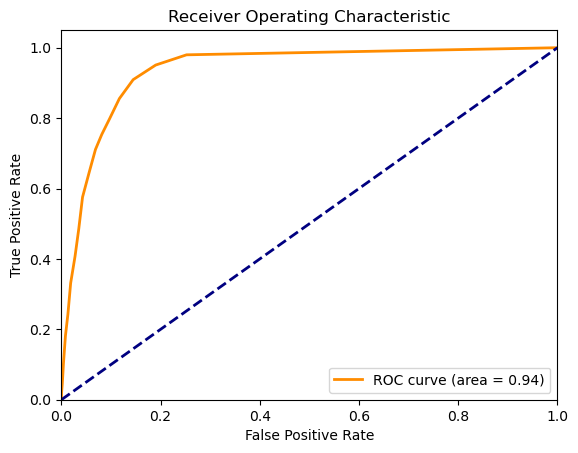

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = clf_knn2.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Submit

In [114]:
testData = pd.read_csv("Assignment3-Unknown-Dataset.csv")

In [115]:
testData.replace(['unknown'], pd.NA, inplace=True)

In [116]:
testData.drop(['default'],axis=1, inplace=True)
missing_categorical = ['job','marital','education','housing','loan']

In [117]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= pd.NA , strategy='most_frequent')
testData[missing_categorical] = imputer.fit_transform(testData[missing_categorical])
testData

row ID  age          job  marital            education housing loan  \
0        Row0   57     services  married          high.school      no   no   
1        Row1   40       admin.  married             basic.6y      no   no   
2        Row2   41  blue-collar  married    university.degree      no   no   
3        Row3   50  blue-collar  married             basic.9y     yes  yes   
4        Row4   39   management   single             basic.9y      no   no   
...       ...  ...          ...      ...                  ...     ...  ...   
6585  Row6585   41   technician  married  professional.course     yes   no   
6586  Row6586   60  blue-collar  married             basic.4y     yes   no   
6587  Row6587   31       admin.   single    university.degree     yes   no   
6588  Row6588   62      retired  married    university.degree     yes   no   
6589  Row6589   62      retired  married    university.degree      no   no   

        contact month day_of_week  duration  campaign  pdays  previous  \
0     telephone   may         mon       149         1    999         0   
1     telephone   may         mon       151         1    999         0   
2     telephone   may         mon        55         1    999         0   
3     telephone   may         mon       353         1    999         0   
4     telephone   may         mon       195         1    999         0   
...         ...   ...         ...       ...       ...    ...       ...   
6585   cellular   nov         mon       185         2    999         0   
6586   cellular   nov         tue       347         2      4         1   
6587   cellular   nov         thu       353         1    999         0   
6588   cellular   nov         thu       208         1      1         6   
6589   cellular   nov         thu       483         2      6         3   

         poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0     nonexistent           1.1          93.994          -36.4      4.857   
1     nonexistent           1.1          93.994          -36.4      4.857   
2     nonexistent           1.1          93.994          -36.4      4.857   
3     nonexistent           1.1          93.994          -36.4      4.857   
4     nonexistent           1.1          93.994          -36.4      4.857   
...           ...           ...             ...            ...        ...   
6585  nonexistent          -1.1          94.767          -50.8      1.039   
6586      success          -1.1          94.767          -50.8      1.035   
6587  nonexistent          -1.1          94.767          -50.8      1.031   
6588      success          -1.1          94.767          -50.8      1.031   
6589      success          -1.1          94.767          -50.8      1.031   

      nr.employed  
0          5191.0  
1          5191.0  
2          5191.0  
3          5191.0  
4          5191.0  
...           ...  
6585       4963.6  
6586       4963.6  
6587       4963.6  
6588       4963.6  
6589       4963.6  

[6590 rows x 20 columns]

In [118]:
testData = testData.drop('row ID', axis=1)
testData

age          job  marital            education housing loan    contact  \
0      57     services  married          high.school      no   no  telephone   
1      40       admin.  married             basic.6y      no   no  telephone   
2      41  blue-collar  married    university.degree      no   no  telephone   
3      50  blue-collar  married             basic.9y     yes  yes  telephone   
4      39   management   single             basic.9y      no   no  telephone   
...   ...          ...      ...                  ...     ...  ...        ...   
6585   41   technician  married  professional.course     yes   no   cellular   
6586   60  blue-collar  married             basic.4y     yes   no   cellular   
6587   31       admin.   single    university.degree     yes   no   cellular   
6588   62      retired  married    university.degree     yes   no   cellular   
6589   62      retired  married    university.degree      no   no   cellular   

     month day_of_week  duration  campaign  pdays  previous     poutcome  \
0      may         mon       149         1    999         0  nonexistent   
1      may         mon       151         1    999         0  nonexistent   
2      may         mon        55         1    999         0  nonexistent   
3      may         mon       353         1    999         0  nonexistent   
4      may         mon       195         1    999         0  nonexistent   
...    ...         ...       ...       ...    ...       ...          ...   
6585   nov         mon       185         2    999         0  nonexistent   
6586   nov         tue       347         2      4         1      success   
6587   nov         thu       353         1    999         0  nonexistent   
6588   nov         thu       208         1      1         6      success   
6589   nov         thu       483         2      6         3      success   

      emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0              1.1          93.994          -36.4      4.857       5191.0  
1              1.1          93.994          -36.4      4.857       5191.0  
2              1.1          93.994          -36.4      4.857       5191.0  
3              1.1          93.994          -36.4      4.857       5191.0  
4              1.1          93.994          -36.4      4.857       5191.0  
...            ...             ...            ...        ...          ...  
6585          -1.1          94.767          -50.8      1.039       4963.6  
6586          -1.1          94.767          -50.8      1.035       4963.6  
6587          -1.1          94.767          -50.8      1.031       4963.6  
6588          -1.1          94.767          -50.8      1.031       4963.6  
6589          -1.1          94.767          -50.8      1.031       4963.6  

[6590 rows x 19 columns]

In [119]:
scale_mapper = {"illiterate":0, "basic.4y":1, "basic.6y":2 ,"basic.9y":3,
               "high.school":4,"professional.course":5,"university.degree":6}
testData["education"] = testData["education"].replace(scale_mapper)

In [120]:
X = testData

In [121]:
# Convert nominal categorical value
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,4,5,6,7,8,13])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Normal KNN

In [122]:
y_pred = clf_knn.predict(X)

In [123]:
emptyPred = pd.read_csv("Assignment3-Kaggle-Submission-Sample.csv")

In [124]:
emptyPred['prediction-subscribed'] = y_pred

In [125]:
emptyPred.to_csv("KNN.csv")

# Normalized + FT

In [69]:
testData = pd.get_dummies(testData, columns = ['job','marital','housing','loan','contact','month','day_of_week','poutcome'])

In [70]:
X = testData[['duration', 'nr.employed','poutcome_success','euribor3m','cons.conf.idx']]

In [71]:
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

In [72]:
X[0]

array([0.04681118, 0.85973535, 0.        , 0.95736961, 0.60251046])

In [73]:
y_pred = clf_knn2.predict(X)

In [74]:
emptyPred = pd.read_csv("Assignment3-Kaggle-Submission-Sample.csv")

In [75]:
emptyPred['prediction-subscribed'] = y_pred

In [76]:
emptyPred.to_csv("KNN-Nor-FT.csv")